# 2. Examine each attribute in the group dataset. What is its datatype?

Timestamp<b> Continuous</b><br>
What is your main study profile?<b> Nominal</b><br>
What aspect of Data Visualization is most interesting to you?<b> Nominal</b><br>
How much effort do you intend to invest into this subject?<b> Discrete</b><br>
Your age (in years)<b> Continious</b><br>
Your height (in cm)<b> Continious</b><br>
Your starsign<b> Nominal</b><br>
Your continent<b> Nominal</b> <br>
How many cousins do you have?<b> Discrete</b><br>
Do you like spicy food?<b> Ordinal</b><br>


# 3.	Reproducible Research 

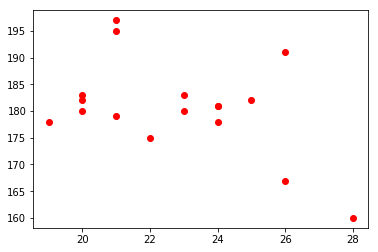

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

age = data['Your age (in years)']
length = data['Your height (in cm)']

plt.plot(age, length, 'ro')
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

stuff = data.groupby(['Your continent'])['How many cousins do you have?'].agg('mean')

stuff

Your continent
Asia             20.000000
Europe            8.285714
South-America    10.000000
Name: How many cousins do you have?, dtype: float64

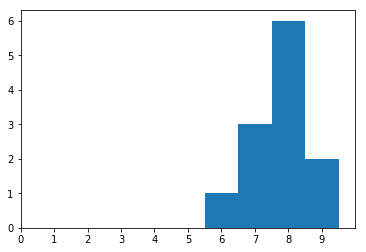

In [45]:
# Effort chart
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

stuff = data['How much effort do you intend to invest into this subject? ']

bins = np.arange(11) - 0.5

plt.hist(stuff, bins)
plt.xticks(range(10))
plt.xlim([0, 10])


plt.show()

# Alot of people are going for an 8 effort, no one is below 6

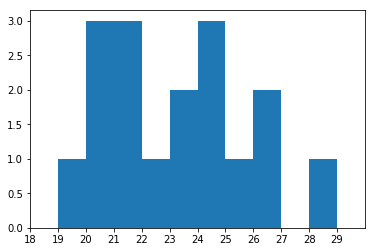

In [46]:
# Age chart
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")


stuff = data['Your age (in years)']

bins = np.arange(30) 

plt.hist(stuff, bins)
plt.xlim([18,30])
plt.xticks(range(18,30))


plt.show()

# Age is pretty evenly spread between 19 and 30

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

stuff = data.groupby(['Your starsign'])['How much effort do you intend to invest into this subject? '].mean()

stuff = stuff.to_frame()

stuff

,How much effort do you intend to invest into this subject?
Your starsign,
Aquarius,8.0
Aries,10.0
Cancer,8.0
Gemini,9.0
Libra,10.0
Pisces,10.0
Sagittarius,8.0
Scorpio,7.5
Taurus,8.0


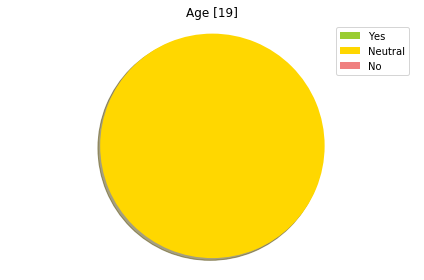

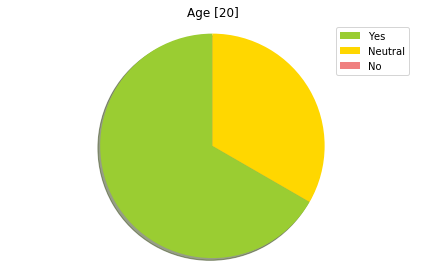

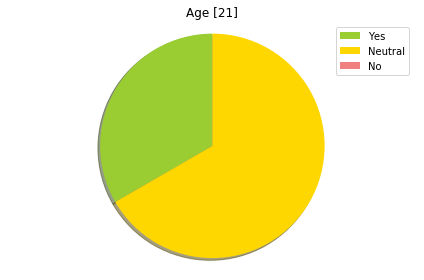

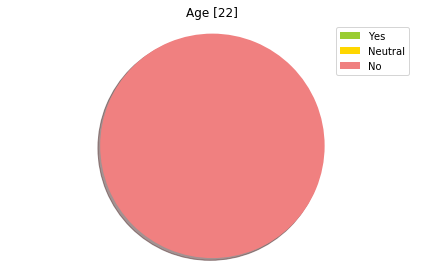

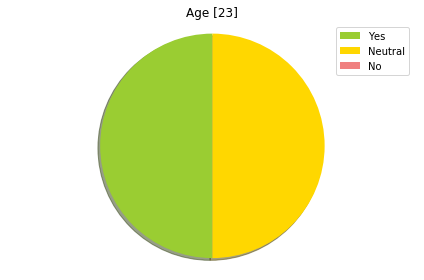

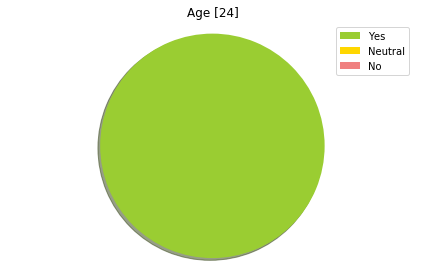

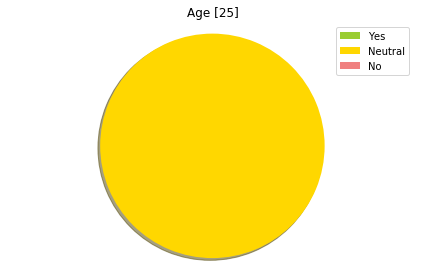

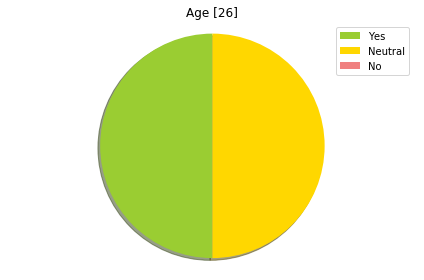

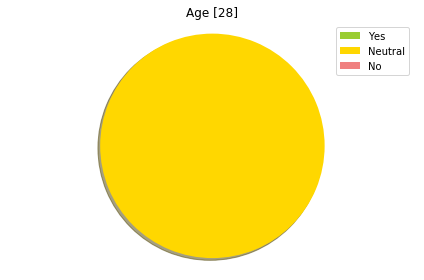

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def numbers_to_percentages(numbers):
    total = sum(numbers)
    return [numbers[0]/total * 100,numbers[1]/total * 100,numbers[2]/total * 100]

data = pd.read_csv("../repo/Week 2/DV01-GroupSurvey.csv")

yes_to_spicy = data.loc[data['Do you like spicy food?'] == 'Yes']['Your age (in years)']
neutral_to_spicy = data.loc[data['Do you like spicy food?'] == 'neutral']['Your age (in years)']
no_to_spicy = data.loc[data['Do you like spicy food?'] == 'No']['Your age (in years)']

agepreference = []

ages = np.arange(17, 30)

for age in ages:
    yes = yes_to_spicy.loc[yes_to_spicy == age].count()
    neutral = neutral_to_spicy[neutral_to_spicy == age].count()
    no = no_to_spicy[no_to_spicy == age].count()
    
    if not(yes == 0 and no == 0 and neutral == 0):
        percentage = numbers_to_percentages([yes, neutral, no])
        agepreference.append(([age]+percentage))

labels = ['Yes', 'Neutral', 'No']
colors = ['yellowgreen', 'gold', 'lightcoral']

for age in agepreference:    
    patches, texts = plt.pie(age[1:4], colors=colors, shadow=True, startangle=90)
    
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.title('Age '+ str(age[:1]))
    plt.tight_layout()
    plt.show()
    